## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [11]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('Downloads/Housing.csv')
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [12]:
#2 Check the shape of the DataFrame (rows, column
df.shape

(545, 13)

In [13]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [14]:
#4 Check for missing  values if any, replace with appropriate values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [15]:
#5 Prepare  X (independent variables) and y (dependent variable)
from sklearn.model_selection import train_test_split
x=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]
y=df[['price']]
print(x,y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3      yes        no       no   
1    8960         4          4        4      yes        no       no   
2    9960         3          2        2      yes        no      yes   
3    7500         4          2        2      yes        no      yes   
4    7420         4          1        2      yes       yes      yes   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1      yes        no      yes   
541  2400         3          1        1       no        no       no   
542  3620         2          1        1      yes        no       no   
543  2910         3          1        1       no        no       no   
544  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1

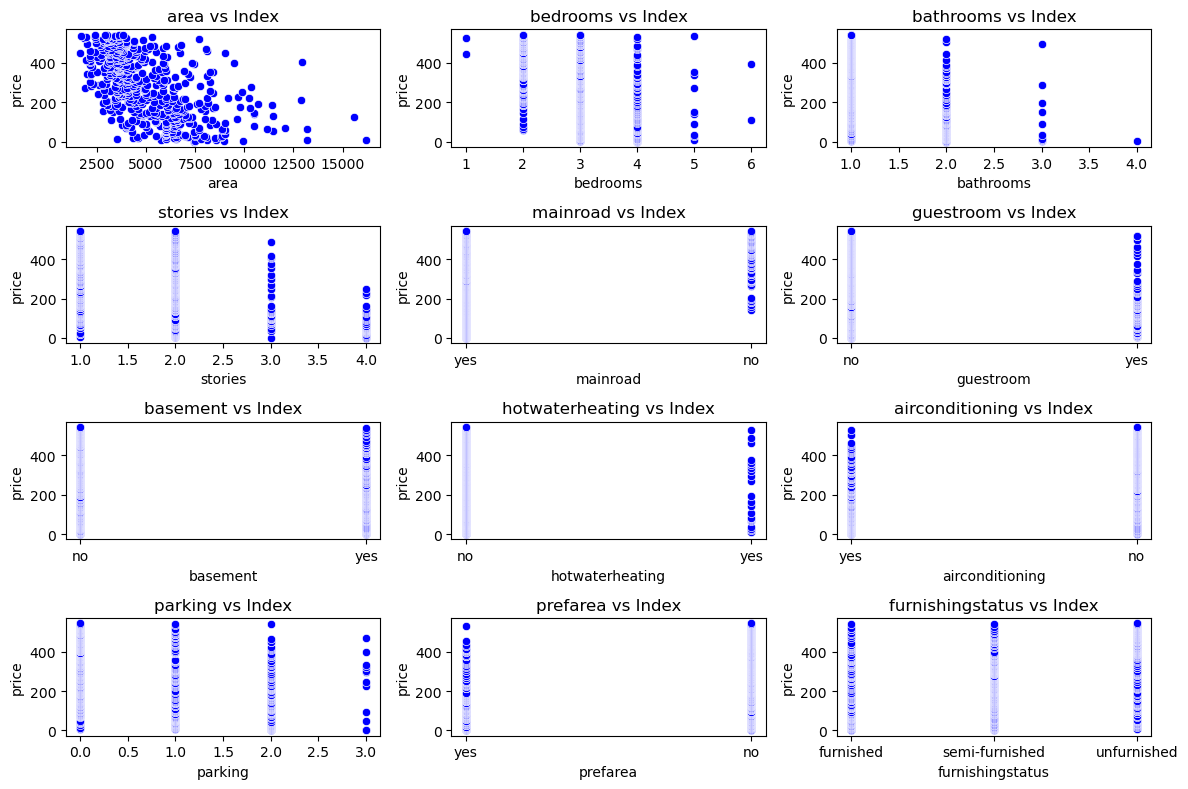

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of independent variables
independent_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
                    'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
                    'parking', 'prefarea', 'furnishingstatus']

# Loop through independent variables and create scatter plots
plt.figure(figsize=(12, 8))

for i, var in enumerate(independent_vars, 1):
    plt.subplot(4, 3, i)  # Arrange in a 4x3 grid
    sns.scatterplot(x=df[var], y=df.index, color='blue')
    plt.xlabel(var)
    plt.ylabel("price")
    plt.title(f"{var} vs Index")

plt.tight_layout()
plt.show()


In [17]:
#7 Encoding categorical data in X
import pandas as pd

# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 
                                         'hotwaterheating', 'airconditioning', 
                                         'prefarea', 'furnishingstatus'], drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

In [18]:
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)


# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_encoded=df.apply(label_encoder.fit_transform)
print(df_encoded)

# Apply label encoding to ordinal categorical columns (if applicable)


     price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0      218   232         3          1        2         1          0         0   
1      217   260         3          3        3         1          0         0   
2      217   268         2          1        1         1          0         1   
3      216   237         3          1        1         1          0         1   
4      215   232         3          0        1         1          1         1   
..     ...   ...       ...        ...      ...       ...        ...       ...   
540      2    39         1          0        0         1          0         1   
541      1    15         2          0        0         0          0         0   
542      0    72         1          0        0         1          0         0   
543      0    35         2          0        0         0          0         0   
544      0    90         2          0        1         1          0         0   

     hotwaterheating  airco

In [19]:
#8  Avoiding the Dummy Variable Trap
import pandas as pd

# One-hot encoding categorical variables while avoiding DVT
df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 
                                         'hotwaterheating', 'airconditioning', 
                                         'prefarea', 'furnishingstatus'], 
                            drop_first=True)

print(df_encoded.head())


      price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0  13300000  7420         4          2        3        2          True   
1  12250000  8960         4          4        4        3          True   
2  12250000  9960         3          2        2        2          True   
3  12215000  7500         4          2        2        3          True   
4  11410000  7420         4          1        2        2          True   

   guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0          False         False                False                 True   
1          False         False                False                 True   
2          False          True                False                False   
3          False          True                False                 True   
4           True          True                False                 True   

   prefarea_yes  furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0          True  

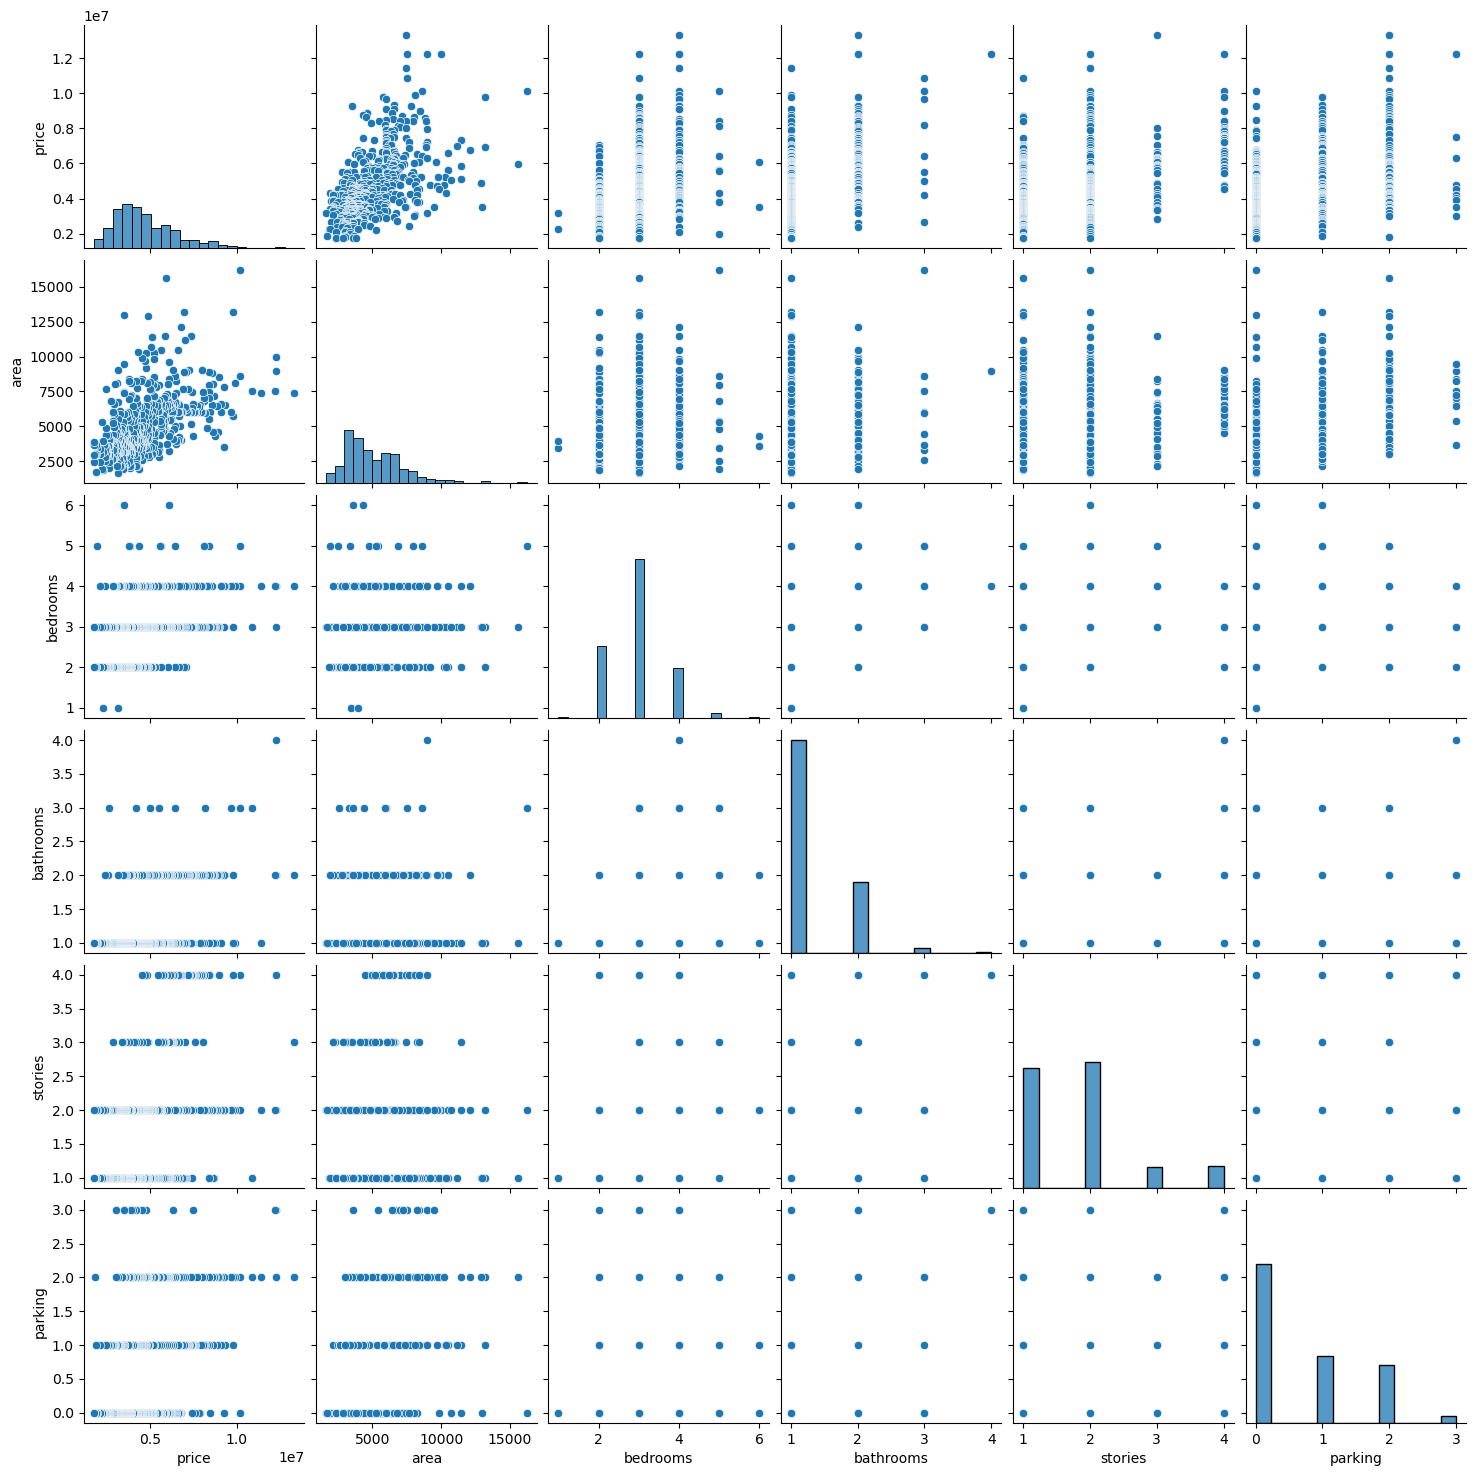

In [20]:
sns.pairplot(df)


In [21]:
#9 Apply feature scaling on numerical variables
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
columns = ["price", "bedrooms",
"bathrooms", "stories","parking"]
df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
df_cleaned = df.dropna(subset=columns)
scaler = StandardScaler()
df_standardized = df_cleaned.copy()
df_standardized[columns] = scaler.fit_transform(df_cleaned[columns])
normalizer = MinMaxScaler()
df_normalized = df_cleaned.copy()
df_normalized[columns] = normalizer.fit_transform(df_cleaned[columns])
print("Standardized Data:")
print(df_standardized[columns].head())
print("\nNormalized Data:")
print(df_normalized[columns].head())

Standardized Data:
      price  bedrooms  bathrooms   stories   parking
0  4.566365  1.403419   1.421812  1.378217  1.517692
1  4.004484  1.403419   5.405809  2.532024  2.679409
2  4.004484  0.047278   1.421812  0.224410  1.517692
3  3.985755  1.403419   1.421812  0.224410  2.679409
4  3.554979  1.403419  -0.570187  0.224410  1.517692

Normalized Data:
      price  bedrooms  bathrooms   stories   parking
0  1.000000       0.6   0.333333  0.666667  0.666667
1  0.909091       0.6   1.000000  1.000000  1.000000
2  0.909091       0.4   0.333333  0.333333  0.666667
3  0.906061       0.6   0.333333  0.333333  1.000000
4  0.836364       0.6   0.000000  0.333333  0.666667


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df[['price','bedrooms','bathrooms','stories','parking']])
print(x_scaled)

[[ 4.56636513  1.40341936  1.42181174  1.37821692  1.51769249]
 [ 4.00448405  1.40341936  5.40580863  2.53202371  2.67940935]
 [ 4.00448405  0.04727831  1.42181174  0.22441013  1.51769249]
 ...
 [-1.61432675 -1.30886273 -0.57018671 -0.92939666 -0.80574124]
 [-1.61432675  0.04727831 -0.57018671 -0.92939666 -0.80574124]
 [-1.61432675  0.04727831 -0.57018671  0.22441013 -0.80574124]]


In [23]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x=df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']]

y=df[['price']]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)
print(X_train,X_test,Y_train,Y_test)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
291  2953         3          1        2      yes        no      yes   
303  4500         3          1        1      yes        no      yes   
228  3630         3          1        2      yes        no       no   
169  6540         4          2        2       no        no       no   
345  2015         3          1        2      yes        no      yes   
..    ...       ...        ...      ...      ...       ...      ...   
344  3850         2          1        1      yes        no       no   
124  6525         3          2        4      yes        no       no   
451  6750         2          1        1      yes        no       no   
187  6100         3          1        1      yes        no      yes   
426  2700         3          1        1       no        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
291              no             yes        0       no      unfurnished  
3

In [24]:
from sklearn.preprocessing import LabelEncoder
df=pd.DataFrame(df)


# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_encoded=df.apply(label_encoder.fit_transform)
print(df_encoded)

# Apply label encoding to ordinal categorical columns (if applicable)


     price  area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0      218   232         3          1        2         1          0         0   
1      217   260         3          3        3         1          0         0   
2      217   268         2          1        1         1          0         1   
3      216   237         3          1        1         1          0         1   
4      215   232         3          0        1         1          1         1   
..     ...   ...       ...        ...      ...       ...        ...       ...   
540      2    39         1          0        0         1          0         1   
541      1    15         2          0        0         0          0         0   
542      0    72         1          0        0         1          0         0   
543      0    35         2          0        0         0          0         0   
544      0    90         2          0        1         1          0         0   

     hotwaterheating  airco

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 1️⃣ Encode Categorical Variables
df_encoded = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 
                                         'hotwaterheating', 'airconditioning', 
                                         'prefarea', 'furnishingstatus'], 
                            drop_first=True)  # Avoid dummy variable trap

# 2️⃣ Define Independent (X) and Dependent (y) Variables
X = df_encoded.drop(columns=['price'])  # Features
y = df_encoded['price']  # Target variable

# 3️⃣ Initialize and Fit the Model
model = LinearRegression()
model.fit(X, y)

# 4️⃣ Get Intercept & Coefficients
intercept = model.intercept_  # Intercept (b0)
coefficients = model.coef_  # Coefficients (b1, b2, ...)

# 5️⃣ Print Results
print(f"Intercept: {intercept:.2f}")
print("Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")


Intercept: 42771.69
Coefficients:
area: 244.1394
bedrooms: 114787.5602
bathrooms: 987668.1073
stories: 450848.0029
parking: 277107.1013
mainroad_yes: 421272.5887
guestroom_yes: 300525.8596
basement_yes: 350106.9041
hotwaterheating_yes: 855447.1454
airconditioning_yes: 864958.3113
prefarea_yes: 651543.7999
furnishingstatus_semi-furnished: -46344.6200
furnishingstatus_unfurnished: -411234.3862


In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to categorical columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Display the first few rows after encoding
print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  


In [27]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [28]:
from sklearn.linear_model import LinearRegression

X = df[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking' ,'prefarea','furnishingstatus' ]]  # Assuming 'price' is the target variable
y = df["price"]

# Split data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Print model coefficients and intercept
print("Model Coefficients:", regressor.coef_)
print("Model Intercept:", regressor.intercept_)

Model Coefficients: [ 2.40689985e+02  7.27523801e+04  1.04225480e+06  4.13851303e+05
  3.81555176e+05  2.38658935e+05  3.20516023e+05  1.13291574e+06
  8.50518774e+05  3.01655486e+05  7.03833415e+05 -1.75925372e+05]
Model Intercept: 209513.00327810645


In [29]:
#12 Predict on the train set and calculate the error = y_pred - y_train
# Make predictions on the test data
y_pred = regressor.predict(X_train)

# Print first 5 predicted values
print("First 5 Predicted Sales values:\n", y_pred[:5])
error=y_pred-y_train
print(error)


First 5 Predicted Sales values:
 [6195994.83750226 6824864.71775069 3205158.64637279 3133743.4374967
 5769939.84587773]
136    4.559948e+05
32    -1.470135e+06
422   -1.548414e+05
347   -7.022566e+05
176    5.199398e+05
           ...     
8     -2.451538e+06
43    -1.206482e+06
111    1.201696e+05
534    1.022254e+06
25    -4.547595e+05
Name: price, Length: 381, dtype: float64


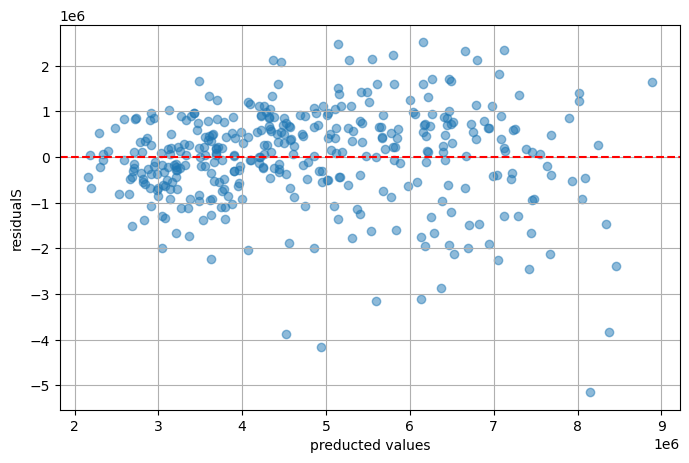

In [30]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
residuals=y_pred-y_train
plt.figure(figsize=(8,5))
plt.scatter(y_pred,residuals,alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("preducted values")
plt.ylabel("residualS")
plt.grid(True)
plt.show()

In [31]:
#14  Predic on the test set
y_pred = regressor.predict(X_test)

# Print first 5 predicted values
print("First 5 Predicted Sales values:\n", y_pred[:5])
error=y_pred-y_test
print(error)


First 5 Predicted Sales values:
 [5705863.27492813 4845654.00477864 6564800.46245297 2865534.2364372
 2921902.18758214]
120   -2.441367e+05
146   -7.543460e+05
71    -1.901995e+05
466   -1.444658e+05
518    4.719022e+05
           ...     
164    1.511231e+06
283   -4.685566e+05
392   -3.628960e+04
165    8.173766e+05
284    9.449572e+04
Name: price, Length: 164, dtype: float64


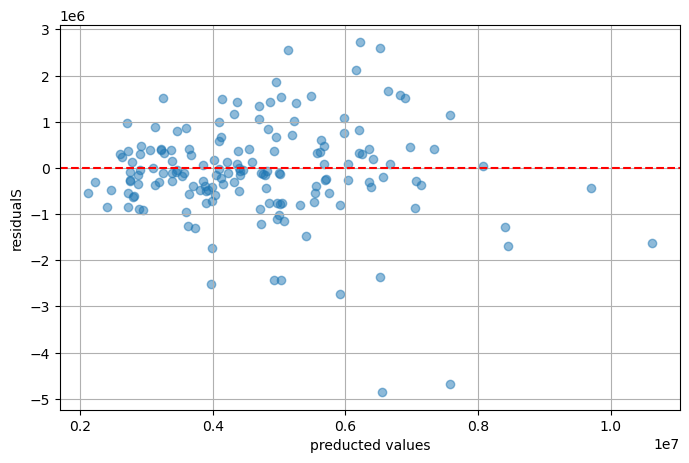

In [32]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
import matplotlib.pyplot as plt
residuals=y_pred-y_test
plt.figure(figsize=(8,5))
plt.scatter(y_pred,residuals,alpha=0.5)
plt.axhline(y=0,color='red',linestyle='--')
plt.xlabel("preducted values")
plt.ylabel("residualS")
plt.grid(True)
plt.show()

In [33]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

1133944060179.5537
0.6832393262505212


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)